In [1]:
import os
import sys
import time
import shutil
import logging
import argparse
import yaml
import traceback

import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('poster')

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
pwd

'/atlas/u/kechoi/f-dre/notebooks'

In [8]:
cd ..

/atlas/u/kechoi/f-dre


In [9]:
from classification.models.mlp import MLPClassifier, MLPClassifierv2
from classification.models.flow_mlp import FlowClassifier
import argparse
import yaml

In [10]:
def dict2namespace(config):
    namespace = argparse.Namespace()
    if isinstance(config, list):
        # from creating config files
        for i in range(len(config)):
            for key, value in config[i].items():
                if isinstance(value, dict):
                    new_value = dict2namespace(value)
                else:
                    new_value = value
                setattr(namespace, key, new_value)
    else:
        # vanilla training
        for key, value in config.items():
            if isinstance(value, dict):
                new_value = dict2namespace(value)
            else:
                new_value = value
            setattr(namespace, key, new_value)
    return namespace

# Load data

In [11]:
import torch
from torch.distributions import Normal

In [12]:
p = Normal(0, 1)
q = Normal(3, 1)

In [13]:
px = p.sample((2000,2))
qx = q.sample((2000,2))

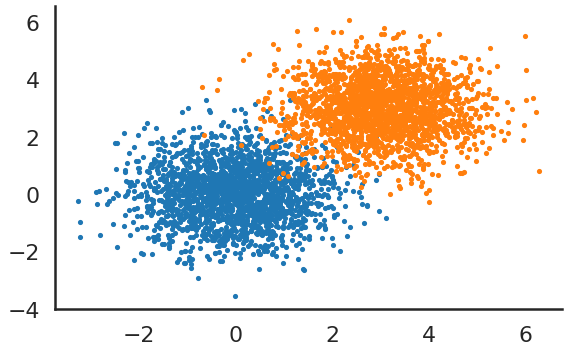

In [14]:
plt.figure(figsize=(8,5))
plt.scatter(px[:,0], px[:,1], label='px', s=10)
plt.scatter(qx[:,0], qx[:,1], label='qx', s=10)

plt.tight_layout()
sns.despine()

In [15]:
true_xs = torch.cat([qx, px])
true_xs.shape

torch.Size([4000, 2])

In [16]:
true_ratios = torch.exp((q.log_prob(true_xs).sum(-1) - p.log_prob(true_xs).sum(-1)))
true_log_r = torch.log(true_ratios)

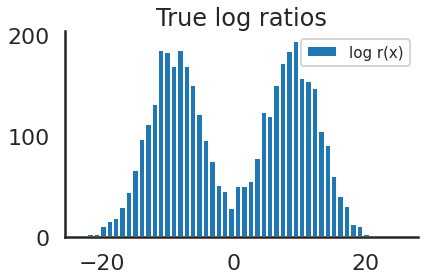

In [17]:
_ = plt.hist(true_log_r.data.cpu().numpy(), bins=50, label='log r(x)')
plt.title('True log ratios')

plt.legend(fontsize=15)
sns.despine()
plt.tight_layout()

------

### rho = 0.9, total dim=40

In [21]:
cd src

/atlas/u/kechoi/f-dre/src


In [23]:
# baselines
baseline = np.load('classification/results/mi_x/est_mi.npy')

In [24]:
# disc
disc = np.load('classification/results/mi_disc_flow_z/est_mi.npy')

In [26]:
# joint
joint = np.load('classification/results/mi_flow_mlp_z/est_mi.npy')

In [27]:
# flow (sep)
sep = np.load('classification/results/mi_z/est_mi.npy')

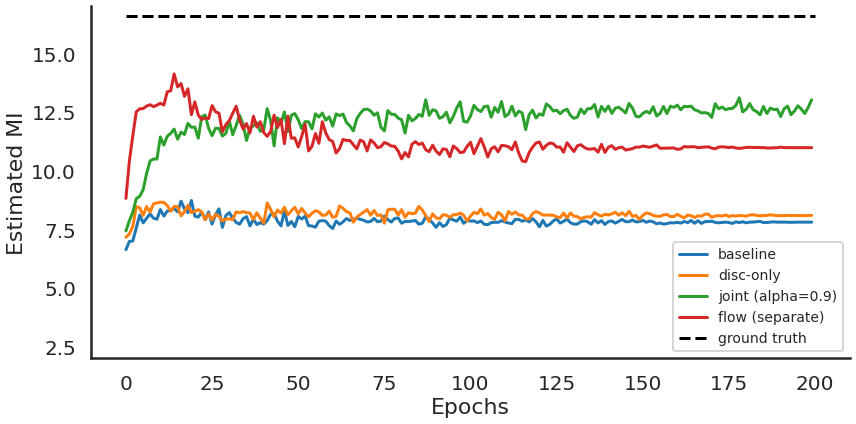

In [33]:
plt.figure(figsize=(12,6))
plt.hlines(16.61, 0, len(joint), linestyle='dashed', color='black', label='ground truth')

plt.plot(range(len(baseline)), baseline, label='baseline')

plt.plot(range(len(disc)), disc, label='disc-only')

plt.plot(range(len(joint)), joint, label='joint (alpha=0.9)')

plt.plot(range(len(sep)), sep, label='flow (separate)')

plt.xlabel('Epochs', fontsize=22)
plt.ylabel('Estimated MI', fontsize=22)
plt.ylim(2, 17)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc='lower right', fontsize=14)
sns.despine()
plt.tight_layout()